# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import imblearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest



from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline



from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pip install kaleido

# Caricamento Database

In [ ]:
cardio_df=pd.read_csv('/content/drive/MyDrive/Mathematics for ML/Cardio.csv', sep=';')

In [ ]:
# ADATTAMENTO AL PROBLEMA BINARIO 
cardio_df.NSP.replace(3,2,inplace=True) #inplace serve per rendere effettiva la modifica anche su cardio_df
cardio_df = cardio_df.rename(columns={"NSP": "TARGET"})
cardio_df = cardio_df.drop('CLASS',1)
cardio_df = cardio_df.drop('Tendency',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
class_distribution = cardio_df.TARGET.value_counts()
class_distribution

1    1655
2     471
Name: TARGET, dtype: int64

In [ ]:
cardio_df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,TARGET
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,2
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,1
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,1
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,...,40,137,177,4,0,153,150,152,2,2
2122,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,...,66,103,169,6,0,152,148,151,3,2
2123,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,...,67,103,170,5,0,153,148,152,4,2
2124,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,...,66,103,169,6,0,152,147,151,4,2


# Missing Values

In [ ]:
#MISSING VALUES
print(cardio_df.isnull().sum())
cardio_df.isna().sum()
print(cardio_df.info())


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
TARGET      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 

In [ ]:
# Conta i duplicati
duplicati = cardio_df.duplicated()
np.count_nonzero(duplicati)

12

# Distribuzione delle classi


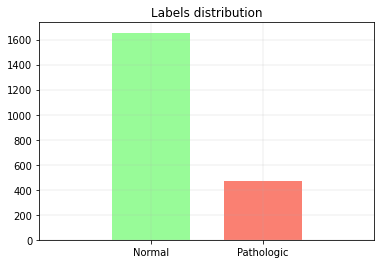

In [ ]:
#HISTOGRAM LABEL DISTRIBUTION
width = 0.07
x=["Normal","Pathologic"]
x_pos=[0.1,0.2]
y=[class_distribution[1],class_distribution[2]]

plt.bar(x_pos, height=y, color=["palegreen", "salmon"], width=0.07, tick_label=x)
plt.xlim(0,0.3)
plt.title("Labels distribution")
plt.xticks([0.1,0.2], x)
plt.grid(b=None, which='major', axis='both', linestyle='-', linewidth=0.2)

plt.show()

In [ ]:
print(cardio_df.groupby('TARGET').count())

          LB    AC    FM    UC    DL    DS    DP  ASTV  MSTV  ALTV  MLTV  \
TARGET                                                                     
1       1655  1655  1655  1655  1655  1655  1655  1655  1655  1655  1655   
2        471   471   471   471   471   471   471   471   471   471   471   

        Width   Min   Max  Nmax  Nzeros  Mode  Mean  Median  Variance  
TARGET                                                                 
1        1655  1655  1655  1655    1655  1655  1655    1655      1655  
2         471   471   471   471     471   471   471     471       471  


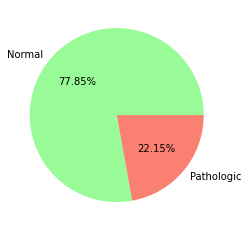

In [ ]:
#PIE CHART
cardio_numpy=cardio_df.to_numpy()
labels= 'Normal', 'Pathologic'
colors = ["palegreen", "salmon"]
plt.pie([class_distribution[1],class_distribution[2]], labels=labels, colors=colors, autopct='%1.2f%%', wedgeprops={'linewidth':5},)
plt.show()

# Statistiche

In [ ]:
#STATISTICS ABOUT ATTRIBUTES
cardio_df_without_target = cardio_df.drop(columns=['TARGET'])
statistics = cardio_df_without_target.describe()
transpStat = statistics.transpose()
transpStat = transpStat.drop(['count'], axis =1)

In [ ]:
skew = cardio_df_without_target.skew()
kurt = cardio_df_without_target.kurt()
transpStat['skewness'] = skew
transpStat['kurtosis'] = kurt


In [ ]:
transpStat

,mean,std,min,25%,50%,75%,max,skewness,kurtosis
LB,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000,0.020312,-0.292943
AC,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284,1.210085,0.784374
FM,0.009474,0.046670,0.0,0.000000,0.000000,0.002512,0.480634,7.812157,64.266963
UC,0.004357,0.002940,0.0,0.001876,0.004482,0.006525,0.014925,0.156377,-0.649461
DL,0.001885,0.002962,0.0,0.000000,0.000000,0.003264,0.015385,1.721570,2.506369
DS,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353,17.811702,321.084735
DP,0.000157,0.000580,0.0,0.000000,0.000000,0.000000,0.005348,4.278801,20.077857
ASTV,46.990122,17.192814,12.0,32.000000,49.000000,61.000000,87.000000,-0.011829,-1.051030
MSTV,1.332785,0.883241,0.2,0.700000,1.200000,1.700000,7.000000,1.657339,4.700756
ALTV,9.846660,18.396880,0.0,0.000000,0.000000,11.000000,91.000000,2.195075,4.252998


In [ ]:
#target=cardio_df["TARGET"].to_numpy()
#target

# BoxPlot per vedere la distribuzione di tutte le feature

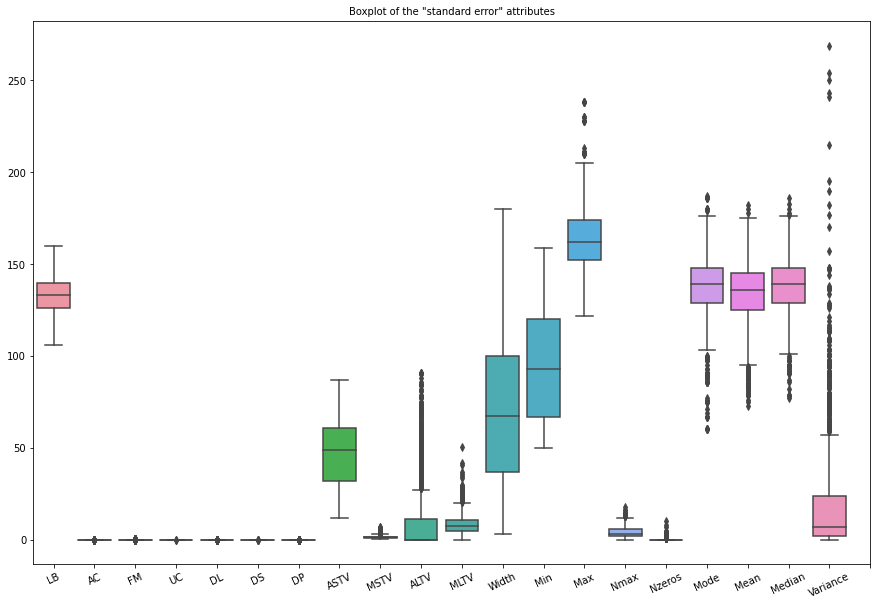

In [ ]:
#BOXPLOT non Normalizzato

x_ticks_labels=['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance']
plt.figure()

cardiosc=np.array(cardio_df_without_target)

mean_labels=[]

fig=plt.figure(1, figsize=(20,15))
fig.set_size_inches(15, 10)
ax=fig.add_subplot(111)
sns.boxplot(data=cardiosc[:,:], orient='v')
plt.xticks(np.arange(0,21), labels=x_ticks_labels, rotation=25, fontsize=10)  
plt.yticks(fontsize=10)
plt.title('Boxplot of the "standard error" attributes', fontsize= 10)

plt.show()


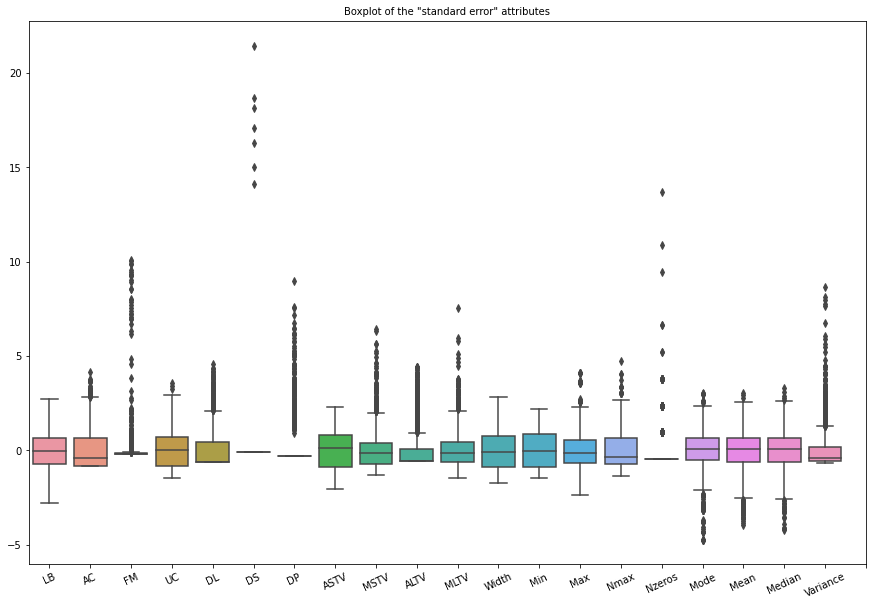

In [ ]:
#BOXPLOT Normalizzato

x_ticks_labels=['LB','AC','FM','UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance']
plt.figure()

#columns=cancer.feature_names
scaler = StandardScaler()
cardiosc=scaler.fit_transform(cardio_df_without_target)

mean_labels=[]

fig=plt.figure(1, figsize=(20,15))
fig.set_size_inches(15, 10)
ax=fig.add_subplot(111)
sns.boxplot(data=cardiosc[:,:], orient='v')
plt.xticks(np.arange(0,21), labels=x_ticks_labels, rotation=25, fontsize=10)  
plt.yticks(fontsize=10)
plt.title('Boxplot of the "standard error" attributes', fontsize= 10)

plt.show()


# Outliers

In [ ]:
cardio_df_out = cardio_df.copy()
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.05), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(cardio_df_out)
pred = clf.predict(cardio_df_out)
cardio_df_out['anomaly']=pred
outliers=cardio_df_out.loc[cardio_df_out['anomaly']==-1]
outlier_index=list(outliers.index)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(cardio_df_out['anomaly'].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


 1    2019
-1     107
Name: anomaly, dtype: int64


<Figure size 432x288 with 0 Axes>

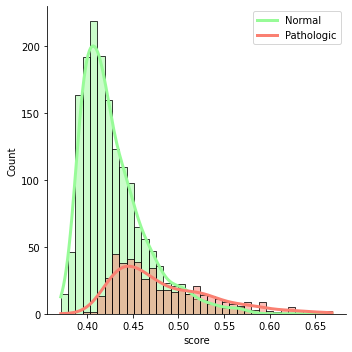

In [ ]:
scores = clf.score_samples(cardio_df)
scores = scores*-1
cardio_df_s = cardio_df.copy()
cardio_df_s['score'] = scores

palette = ["salmon","palegreen"]
f = plt.figure()
#sns.displot(cardio_df_s, x='score', hue="TARGET", kind="kde", fill=True, palette=palette, alpha=0.7, hue_order=[2,1], legend = False)
sns.displot(data=cardio_df_s, x="score", hue = "TARGET", kde=True, palette = palette,
            line_kws={'lw': 3}, hue_order=[2,1], legend = False)
#sns.kdeplot(data=cardio_df_s, x='score',multiple="stack", hue="TARGET", palette=palette, alpha = 0.4)
plt.legend(labels=['Normal','Pathologic'])
plt.show()

In [ ]:
print(cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'])

TARGET  anomaly
1       -1           27
         1         1628
2       -1           80
         1          391
Name: LB, dtype: int64


In [ ]:
outNorm = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[0]
inNorm = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[1]
outPat = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[2]
inPat = cardio_df_out.groupby(['TARGET','anomaly']).count()['LB'].iloc[3]
percNorm = outNorm/inNorm*100
percPat = outPat/inPat*100
print("Percentage of outliers in the normal class: ",'{0:.3}'.format(percNorm),"%")
print("Percentage of outliers in the pathologic class: ",'{0:.3}'.format(percPat),"%")

Percentage of outliers in the normal class:  1.66 %
Percentage of outliers in the pathologic class:  20.5 %


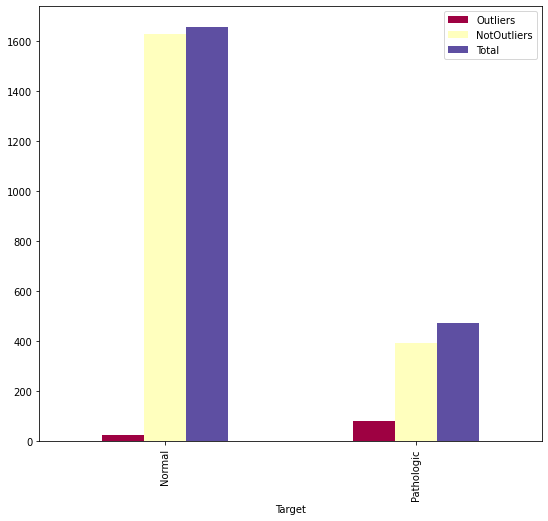

In [ ]:
data=[["Normal",outNorm,inNorm,outNorm+inNorm],
      ["Pathologic",outPat,inPat,outPat+inPat]]

df=pd.DataFrame(data,columns=["Target","Outliers","NotOutliers","Total"])
df.plot(x="Target", y=["Outliers","NotOutliers","Total"], kind="bar",figsize=(9,8), colormap="Spectral")
plt.show()

RICERCA OUTLIERS NEL MODO VECHIO --> DA NON GUARDARE

In [ ]:
# Ricerca Outliers vecchio modo

'''
iforest = IsolationForest(n_estimators = 100).fit(cardio_df)
scores = iforest.score_samples(cardio_df)
cardio_df_s = cardio_df.copy()
cardio_df_s['score'] = scores
'''

"\niforest = IsolationForest(n_estimators = 100).fit(cardio_df)\nscores = iforest.score_samples(cardio_df)\ncardio_df_s = cardio_df.copy()\ncardio_df_s['score'] = scores\n"

In [ ]:
'''
palette = ["red","blue"]
f = plt.figure()
sns.displot(cardio_df_s, x='score', hue="TARGET", kind="kde", fill=True, palette=palette)
plt.show()
'''

'\npalette = ["red","blue"]\nf = plt.figure()\nsns.displot(cardio_df_s, x=\'score\', hue="TARGET", kind="kde", fill=True, palette=palette)\nplt.show()\n'

In [ ]:
'''
toDrop = iforest.predict(cardio_df)
f = plt.figure()
sns.displot(toDrop,kind = "kde", fill = True)
plt.show()
out = (toDrop == -1).sum()
inlier = (toDrop ==1).sum()

print(out)
print(inlier)
print(out+inlier)
'''

'\ntoDrop = iforest.predict(cardio_df)\nf = plt.figure()\nsns.displot(toDrop,kind = "kde", fill = True)\nplt.show()\nout = (toDrop == -1).sum()\ninlier = (toDrop ==1).sum()\n\nprint(out)\nprint(inlier)\nprint(out+inlier)\n'

In [ ]:
#cardio_df_s['toDrop'] = toDrop
'''
palette = ["yellow","green"]
f = plt.figure()
sns.displot(cardio_df_s, x='toDrop', hue="NSP", kind="kde", fill=True, palette=palette)
plt.show()
'''

'\npalette = ["yellow","green"]\nf = plt.figure()\nsns.displot(cardio_df_s, x=\'toDrop\', hue="NSP", kind="kde", fill=True, palette=palette)\nplt.show()\n'

In [ ]:
# divisione nelle due classi --> 1655 normali, 471 malati

#print(cardio_df_s.groupby('NSP').count())

# divisione di quelli che sono considerati outlier nelle due classi:

#print(cardio_df_s.groupby(['NSP','toDrop']).count())

# 94 (su 1655) 5,7% e 175 (su 471) 37,2 % --> decisamente un numero molto superiore
# trovato tra la classe dei malati, che già è under rappresentata --> non si tolgono, 
#potrebbero darci informazioni importanti per identificare proprio la malattia.
# Per esempio, quando abbiamo LB fuori dal range solito è sintomo di feti prematuri 
#quindi chiaramente un'informazione che NON vogliamo eliminare

# Scatter Interaction per vedere le due classi nello spazio

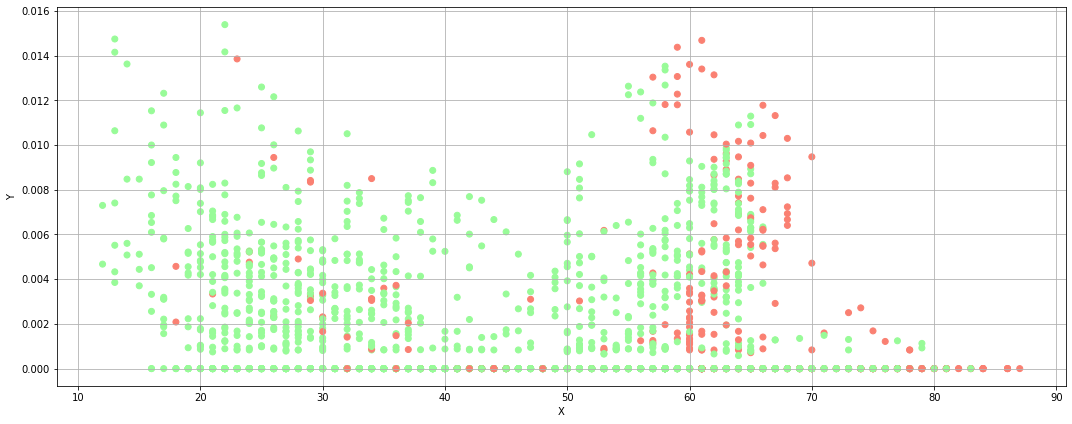

In [ ]:
#SCATTER INTERACTION

X= cardio_df_without_target['ASTV'].to_numpy()  
Y=cardio_df_without_target['DL'].to_numpy()

target=cardio_df["TARGET"].to_numpy()


fig, ax = plt.subplots(figsize= (15,6))

labels=['Normal', 'Pathologic']
#labels=['Pathologic', 'Normal']
#pop_a = mpatches.Patch(color='steelblue', label='Normal')
#pop_b = mpatches.Patch(color='crimson', label='Pathologic')
colors=['palegreen','salmon']


ax.scatter(X, Y, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')


plt.tight_layout()# let's make good plots
plt.show()


# Divisione delle due classi e Feature Distribution

In [ ]:
#SPLIT INTO DIFFERENT DATAFRAME ACCORDING TO CLASS
datasets= {}
cardio_by_class = cardio_df.groupby("TARGET")
cardio_by_class

for groups, data in cardio_by_class: #qui groups sono 1 e 2.
    datasets[groups] = data #creo un dizionario dove per la classe 1 ho il df dei normali e per la classe 2 quello dei patologici

normal_numpy = datasets[1].to_numpy()
pathologic_numpy = datasets[2].to_numpy()
#pathologic_numpy
#datasets

In [ ]:
cardio_numpy[:,0]

array([120., 132., 133., ..., 140., 140., 142.])

In [ ]:
features_name = cardio_df.columns.values
features_name

array(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'TARGET'], dtype=object)

In [ ]:
#FEATURES DISTRIBUTION - HISTOGRAMS
'''
fig, axes= plt.subplots(5,4, figsize=(20,15))
ax = axes.ravel()
features_name = cardio_df.columns.values

for i in range(20):
  _,bins=np.histogram(cardio_numpy[:,i],bins=40)
  ax[i].hist(normal_numpy[:,i],bins=bins,color='palegreen',alpha=0.7)
  ax[i].hist(pathologic_numpy[:,i],bins=bins,color='salmon',alpha=0.8)
  ax[i].set_title(features_name[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(True)
  ax[i].set_yticks(())
  ax[i].legend(['Normal', 'Pathologic'],loc='best',fontsize=8)
 
plt.tight_layout()
plt.show()
'''

"\nfig, axes= plt.subplots(5,4, figsize=(20,15))\nax = axes.ravel()\nfeatures_name = cardio_df.columns.values\n\nfor i in range(20):\n  _,bins=np.histogram(cardio_numpy[:,i],bins=40)\n  ax[i].hist(normal_numpy[:,i],bins=bins,color='palegreen',alpha=0.7)\n  ax[i].hist(pathologic_numpy[:,i],bins=bins,color='salmon',alpha=0.8)\n  ax[i].set_title(features_name[i],fontsize=9)\n  ax[i].axes.get_xaxis().set_visible(True)\n  ax[i].set_yticks(())\n  ax[i].legend(['Normal', 'Pathologic'],loc='best',fontsize=8)\n \nplt.tight_layout()\nplt.show()\n"

In [ ]:
#FEATURES DISTRIBUTION - KDE

'''
palette = ["salmon","palegreen"]
f = plt.figure()
for i in range(20):
  #sns.set(rc={'figure.figsize':(40,40)})
  sns.displot(cardio_df, x=cardio_df.columns.values[i], hue="TARGET", 
              kind="kde", fill=True, palette=palette, legend = False, alpha = 0.8, hue_order=[2,1],height=8.27, aspect=11.7/8.27)

  plt.legend(labels=['Normal','Pathologic'])
  plt.show()
'''

'\npalette = ["salmon","palegreen"]\nf = plt.figure()\nfor i in range(20):\n  #sns.set(rc={\'figure.figsize\':(40,40)})\n  sns.displot(cardio_df, x=cardio_df.columns.values[i], hue="TARGET", \n              kind="kde", fill=True, palette=palette, legend = False, alpha = 0.8, hue_order=[2,1],height=8.27, aspect=11.7/8.27)\n\n  plt.legend(labels=[\'Normal\',\'Pathologic\'])\n  plt.show()\n'

# Matrice di correlazione

In [ ]:
 #CORRELATION MATRIX

sns.set(style="white", font_scale=1)
corr=cardio_df_without_target.corr(method='pearson')
corr


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,-0.032091,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,-0.144876,0.298922,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,0.011062,0.162657,-0.153883,0.099619,0.164450,-0.017855,-0.061042,-0.089502,-0.072175,0.179309
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,-0.068487,0.140247,-0.111860,0.120195,0.081860,0.057815,-0.106559,-0.190340,-0.142111,0.238755
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,-0.243174,0.520282,-0.553921,0.217002,0.397183,0.235296,-0.350232,-0.530564,-0.390822,0.567483
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,-0.041751,0.044434,-0.071670,-0.021600,0.006892,0.049462,-0.216356,-0.162154,-0.165038,0.132999
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,-0.226737,0.266457,-0.278293,0.120019,0.221066,0.057278,-0.437137,-0.492250,-0.448311,0.505023
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,-0.315105,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,0.073892,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,-0.171114,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


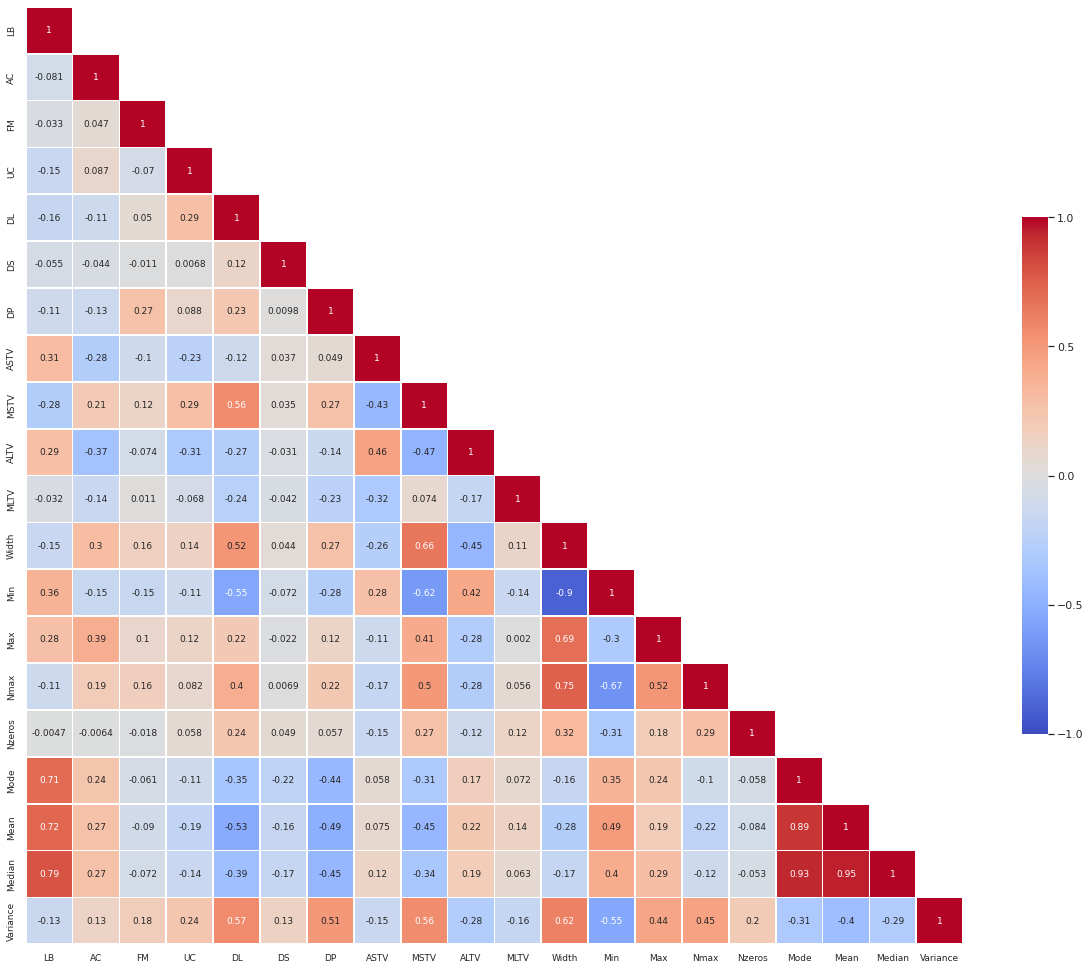

In [ ]:
#Plot correlation matrix


mask = np.triu(np.ones_like(corr, dtype=np.bool),+1)
f, ax = plt.subplots(figsize=(21, 19))
#cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
cmap = sns.color_palette("coolwarm", as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.7, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 9})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()


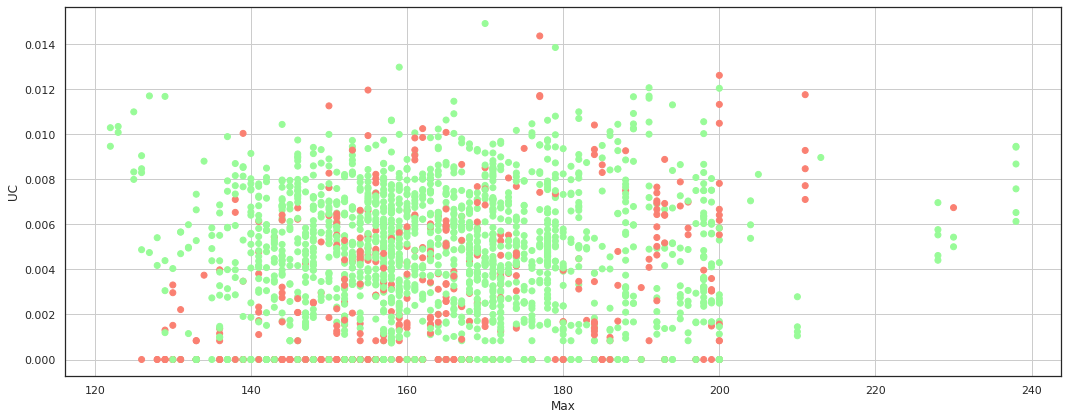

In [ ]:
# SCATTER PLOT FEATURE CORRELATE

first = 'Max'
second = 'UC'

X= cardio_df_without_target[first].to_numpy()  
Y=cardio_df_without_target[second].to_numpy()

target=cardio_df["TARGET"].to_numpy()


fig, ax = plt.subplots(figsize= (15,6))

labels=['Normal', 'Pathologic']
#labels=['Pathologic', 'Normal']
#pop_a = mpatches.Patch(color='steelblue', label='Normal')
#pop_b = mpatches.Patch(color='crimson', label='Pathologic')
colors=['palegreen','salmon']


ax.scatter(X, Y, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)
ax.grid()
ax.set_xlabel(first)
ax.set_ylabel(second)


plt.tight_layout()# let's make good plots
plt.show()

# Pipeline

In [ ]:
#SELEZIONA PASSAGGI CHE VOGLIAMO FARE

# Feature selection 
feature_selection = True
applay_pca = False
applay_pca_pi = False

# Balancing Dataset
overRand = False
overSMOTE = False
underCentr = False
overSMOOTEN = False

# Correlazione per feature selection

In [ ]:
#CORRELAZIONE DELLE VARIABILI CON LA CLASSE TARGET

correlation = cardio_df.corr()
corr_target = abs(correlation['TARGET'])

relevant_features= corr_target[corr_target> 0]
relevant_features.sort_values(ascending=False)

TARGET      1.000000
ASTV        0.493391
ALTV        0.489400
AC          0.394988
DP          0.340895
UC          0.263823
LB          0.251875
MSTV        0.207717
MLTV        0.172519
Min         0.158171
Width       0.142182
Mode        0.092320
DS          0.090782
Variance    0.085948
FM          0.060913
Nmax        0.060354
Mean        0.059107
Max         0.048106
Median      0.047890
Nzeros      0.031163
DL          0.030166
Name: TARGET, dtype: float64

In [ ]:
#ALTRE VARIABILI CON CORRELAZIONE MAGGIORE

c=correlation.abs().unstack()
c.sort_values(ascending=False, inplace=True)
col_above = [(col1,col2, c[col1,col2]) for col1, col2 in c.index if c[col1,col2] > 0.85 and col1 != col2]
print(col_above)

[('Median', 'Mean', 0.9482513380408178), ('Mean', 'Median', 0.9482513380408178), ('Mode', 'Median', 0.9333991564866512), ('Median', 'Mode', 0.9333991564866512), ('Width', 'Min', 0.8985189643113362), ('Min', 'Width', 0.8985189643113362), ('Mean', 'Mode', 0.8934123838327097), ('Mode', 'Mean', 0.8934123838327097)]


In [ ]:
#FEATURE SELECTION
if feature_selection == True:
    
  todrop = []
  for i in range(len(col_above)):
    feature1 = col_above[i][0]
    feature2 = col_above[i][1]
    if(corr_target[feature1]>=corr_target[feature2]):
      todrop.append(feature2)
    else:
      todrop.append(feature1)

  todrop_set = set(todrop)
  print (todrop_set)

  #eliminiamo tutte le colonne che vogliamo droppare
  cardio_df_without_target= cardio_df_without_target.drop(cardio_df_without_target[todrop_set], axis = 1)
  cardio_df= cardio_df.drop(cardio_df[todrop_set], axis = 1)

{'Width', 'Mean', 'Median'}


# Train/test split

In [ ]:
#TRAIN TEST SPLIT 

cardio_numpy_without_target=cardio_df_without_target.to_numpy() 
X_train, X_test, Y_train, Y_test = train_test_split(cardio_numpy_without_target, target, test_size=0.33, random_state=42, stratify=target)

'''
print(np.shape(X_train))
print(np.shape(X_test))

print(len(Y_train[Y_train==1]))
print(len(Y_train[Y_train==2]))
print(len(Y_train[Y_train==3]))

print(len(Y_test[Y_test==1]))
print(len(Y_test[Y_test==2]))
print(len(Y_test[Y_test==3]))
'''

'\nprint(np.shape(X_train))\nprint(np.shape(X_test))\n\nprint(len(Y_train[Y_train==1]))\nprint(len(Y_train[Y_train==2]))\nprint(len(Y_train[Y_train==3]))\n\nprint(len(Y_test[Y_test==1]))\nprint(len(Y_test[Y_test==2]))\nprint(len(Y_test[Y_test==3]))\n'

In [ ]:
cardio_df_without_target

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Min,Max,Nmax,Nzeros,Mode,Variance
0,120,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,62,126,2,0,120,73
1,132,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,68,198,6,1,141,12
2,133,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,68,198,5,1,141,13
3,134,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,53,170,11,0,137,13
4,132,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,53,170,9,0,137,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79,0.2,25,7.2,137,177,4,0,153,2
2122,140,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78,0.4,22,7.1,103,169,6,0,152,3
2123,140,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79,0.4,20,6.1,103,170,5,0,153,4
2124,140,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78,0.4,27,7.0,103,169,6,0,152,4


# Standardizzazione

In [ ]:
# STANDARDIZZAZIONE
sc= StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# *PCA (inside the k-fold cross val)*

In [ ]:
# DIMENSIONALITY REDUCTION - PCA

if applay_pca==True:

  pca = PCA(n_components=11, random_state=2020)
  X_train = pca.fit_transform(X_train)

  
  print(X_train.shape)
  var_exp=pca.explained_variance_ratio_ 
  cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

  X_test = pca.transform(X_test)

  # plot explained variances

  
  fig=plt.figure(1, figsize=(10,8))
  plt.bar(range(0,len(var_exp)), height=var_exp, alpha=0.5, align='center', color = 'mediumturquoise')
  plt.plot(range(0,len(var_exp)), cum_var_exp, marker='o',  label='cumulative explained variance',color = 'teal' )
  plt.ylabel('Explained variance ratio', fontsize= 10)
  plt.xlabel('Principal component index', fontsize=10)
  plt.xticks( range(0,len(var_exp)), range(1,(len(var_exp)+1)))
  plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
  plt.legend(loc='best')
  plt.grid()
  plt.show()


In [ ]:
# Scatter interaction plot sulle due più importanti PCA (train)
'''
pca1= X_train[:,0]
pca2=X_train[:,1]

target=Y_train


fig, ax = plt.subplots(figsize= (15,6))

labels=['Normal', 'Pathologic']
pop_a = mpatches.Patch(color='steelblue', label='Normal')
pop_b = mpatches.Patch(color='crimson', label='Pathologic')
colors=['palegreen','salmon']

ax.scatter(pca1, pca2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)
ax.grid()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')


plt.tight_layout()# let's make good plots
plt.show()
'''

"\npca1= X_train[:,0]\npca2=X_train[:,1]\n\ntarget=Y_train\n\n\nfig, ax = plt.subplots(figsize= (15,6))\n\nlabels=['Normal', 'Pathologic']\npop_a = mpatches.Patch(color='steelblue', label='Normal')\npop_b = mpatches.Patch(color='crimson', label='Pathologic')\ncolors=['palegreen','salmon']\n\nax.scatter(pca1, pca2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels)\nax.grid()\nax.set_xlabel('PCA1')\nax.set_ylabel('PCA2')\n\n\nplt.tight_layout()# let's make good plots\nplt.show()\n"

# *Resampling (inside the k-fold cross validation)*

In [ ]:
# OVERSAMPLING RANDOM
'''
if overRand:
  oversampleRand = RandomOverSampler(sampling_strategy='minority')
  X_train, Y_train = oversampleRand.fit_resample(X_train, Y_train)
'''

"\nif overRand:\n  oversampleRand = RandomOverSampler(sampling_strategy='minority')\n  X_train, Y_train = oversampleRand.fit_resample(X_train, Y_train)\n"

In [ ]:
# controllo dell'oversampling:
'''
Y_train
unique, counts = np.unique(Y_train, return_counts=True)
dict(zip(unique, counts))
'''

'\nY_train\nunique, counts = np.unique(Y_train, return_counts=True)\ndict(zip(unique, counts))\n'

In [ ]:
'''
#OVERSAMPLING SMOTE
if overSMOTE:
  smote = SMOTE(random_state=42)
  X_train, Y_train = smote.fit_resample(X_train, Y_train)

#UNDERSAMPLING
elif underCentr:
  under = ClusterCentroids(random_state=42)
  X_train, Y_train = under.fit_resample(X_train, Y_train)

#SMOOTEN
elif overSMOOTEN:
  sme = SMOTEENN(sampling_strategy='minority',
                enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42)

  X_train, Y_train = sme.fit_resample(X_train, Y_train)
'''

"\n#OVERSAMPLING SMOTE\nif overSMOTE:\n  smote = SMOTE(random_state=42)\n  X_train, Y_train = smote.fit_resample(X_train, Y_train)\n\n#UNDERSAMPLING\nelif underCentr:\n  under = ClusterCentroids(random_state=42)\n  X_train, Y_train = under.fit_resample(X_train, Y_train)\n\n#SMOOTEN\nelif overSMOOTEN:\n  sme = SMOTEENN(sampling_strategy='minority',\n                enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42)\n\n  X_train, Y_train = sme.fit_resample(X_train, Y_train)\n"

# Classification methods

In [ ]:
#CLASSIFICAZIONE

algoritmo = 'KNN'#


if algoritmo == 'SVM' : 
    # Support Vector Machine (SVM) classifier
    # best config found {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} 
    parameter_grid = {
      'C': [100, 0.1, 1, 10, 0.001, 0.0001],
      'kernel': ['rbf', 'poly','linear'],
      'gamma': [0.0001, 0.001, 0.01]
    }
    clf_name = 'svc__'
    classifier = SVC() # or SVC
    
elif algoritmo == 'RandomForest':
    # Random Forest classifier
    # {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__oob_score': True}
    parameter_grid = {
      "criterion":["gini", "entropy"],
      "max_features":[None, "sqrt"],
      "oob_score":[True],
      "n_estimators":[10, 50, 100, 200]
    }
    clf_name = 'randomforestclassifier__'
    classifier = RandomForestClassifier()
    
elif algoritmo == 'LogisticRegression':
    # Logistic Regression classifier
    parameter_grid = {
        "C":[0.0001, 0.001, 0.01, 0.1, 1, 10],
        "max_iter":[100,200,300,600]
    }
    clf_name = 'logisticregression__'
    classifier = LogisticRegression()
    
elif algoritmo == 'KNN':
    # K-Nearest Neighbors classifier
    parameter_grid = {
        "n_neighbors":[100, 200, 50, 30, 20, 10, 5, 3],
        "weights":['uniform','distance'],
        "p":[1,2,2000]
    }
    clf_name = 'kneighborsclassifier__'
    classifier = KNeighborsClassifier() 
else :
    raise RuntimeError("Choose a correct classifier.");


#new_params = {key: parameter_grid[key] for key in parameter_grid}
new_params = {clf_name + key: parameter_grid[key] for key in parameter_grid}
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

if applay_pca_pi:
  if overRand:
      my_pipeline = make_pipeline(PCA(n_components=11, random_state=2020), RandomOverSampler(sampling_strategy='minority',random_state=42), classifier)
  elif overSMOTE:
      my_pipeline = make_pipeline(PCA(n_components=11, random_state=2020), SMOTE(random_state=42), classifier)
  elif underCentr:
      my_pipeline = make_pipeline(PCA(n_components=11, random_state=2020), ClusterCentroids(random_state=42), classifier)
  elif overSMOOTEN:
      my_pipeline = make_pipeline(PCA(n_components=11, random_state=2020), SMOTEENN(sampling_strategy='minority',enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42), classifier)        
  else :
      # DO NOT apply oversampling on training dataset, just the classifier
      my_pipeline = make_pipeline(PCA(n_components=11, random_state=2020),classifier)

else:
  if overRand:
      my_pipeline = make_pipeline(RandomOverSampler(sampling_strategy='minority',random_state=42), classifier)
  elif overSMOTE:
      my_pipeline = make_pipeline(SMOTE(random_state=42), classifier)
  elif underCentr:
      my_pipeline = make_pipeline(ClusterCentroids(random_state=42), classifier)
  elif overSMOOTEN:
      my_pipeline = make_pipeline(SMOTEENN(sampling_strategy='minority',enn=EditedNearestNeighbours(sampling_strategy='all',kind_sel='all'), random_state=42), classifier)        
  else :
      # DO NOT apply oversampling on training dataset, just the classifier
      my_pipeline = make_pipeline(classifier)

SCORE = 'f1' # 'accuracy', 'precision', 'recall', 'f1'

#precision = make_scorer(precision_score, average='weighted')
f1 = make_scorer(f1_score, pos_label = 2, average='binary')
#accuracy = make_scorer(accuracy_score)

grid = GridSearchCV(my_pipeline, param_grid=new_params, cv=kf, scoring=f1, return_train_score=True)
grid.fit(X_train, Y_train)

print(f"Best configuration found for {classifier}:")
print(grid.best_params_)
print(f"Val {SCORE}:   {grid.best_score_}")

Best configuration found for KNeighborsClassifier():
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Val f1:   0.8212357078846697


# Results

In [ ]:
#TEST
'''
new_model = SVC(**grid.best_params_)
new_model.fit(X_train, Y_train)
Y_pred = new_model.predict(X_test)
'''

#il grid mantiene già i best params che avevamo trovato
Y_pred = grid.predict(X_test)

report = classification_report(Y_test, Y_pred)
accuracy=accuracy_score(Y_test, Y_pred)
f1=f1_score(Y_test, Y_pred, pos_label = 2, average='binary')
precision=precision_score(Y_test, Y_pred, pos_label = 2)
recall=recall_score(Y_test, Y_pred, pos_label = 2)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print(f"")

print(report)

Accuracy:  0.9216524216524217
Precision:  0.8344370860927153
Recall:  0.8076923076923077
F1:  0.8208469055374592

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       546
           2       0.83      0.81      0.82       156

    accuracy                           0.92       702
   macro avg       0.89      0.88      0.89       702
weighted avg       0.92      0.92      0.92       702



# Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


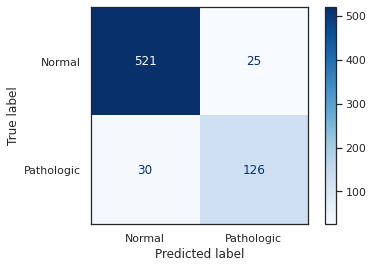

In [ ]:
disp = plot_confusion_matrix(grid, X_test, Y_test,
                                 display_labels=['Normal','Pathologic'],
                                 cmap=plt.cm.Blues, 
                                 #display_labels=data.target_names, 
                                 normalize=None)

#disp.ax_.set_title(f'normalized confusion matrix {clf_name}')

# Saving results

KNN Results